In [1]:
### Content

# 1- Libraries
# 2- API
# 3- Download the Files
# 4- Read the Files
# 5- Data Preperation
# 6- Exploratory Data Analysis
# 7- Building Model-0 // Benchmark
# 8- Data Cleaning

### 1- Libraries

In [42]:
# Data Manipulation and Cleaning Libraries
import pandas as pd  # For data manipulation and data frames
import numpy as np  # For numerical operations and arrays

# File and System Operations Libraries
import os  # For operating system interactions, like file handling
import sys
import zipfile  # For working with zip files

# Dataset Access Libraries
from kaggle.api.kaggle_api_extended import KaggleApi  # For accessing datasets from Kaggle
from config import *  # Importing custom configurations
from model_eval_func import evaluate_model_performance, evaluate_model

# Data Visualization Libraries
import seaborn as sns  # For advanced data visualization
from matplotlib import pyplot as plt  # For plotting graphs and charts
import matplotlib  # For customizing matplotlib settings

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder  # For converting categorical data to numerical
from sklearn.model_selection import train_test_split # Train Test Split

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Scaling
from sklearn.preprocessing import MinMaxScaler


### 2- API

In [ ]:
# Kaggle API
api = KaggleApi()
api.authenticate()

competition = comp
api.competition_download_files(competition, path=path_1)


### 3- Download the Files

In [ ]:
# Download the file
zip_file_path = os.path.join(path_1, 'playground-series-s4e1.zip')  # Burada dosya adını doğru şekilde belirtin

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path_1)

print(f"Zip Files Saved...")

### 4- Read the Files

In [3]:
# Raw data klasörünün yolu
raw_data_directory = path_1

In [4]:
# Klasörün içindeki dosyaları listeleme
if os.path.exists(path_1) and os.path.isdir(path_1):
    files = os.listdir(path_1)
    print("Files in the Raw Folder:")
    print(" ")
    for file in files:
        print(file)
else:
    print("Belirtilen klasör yok veya bir dizin değil.")

Files in the Raw Folder:
 
playground-series-s4e1.zip
sample_submission.csv
test.csv
train.csv


In [5]:
# Klasördeki dosyaları listele
files = os.listdir(path_1)

print("Dataframes: ")
print("")

# CSV dosyalarını oku ve değişken olarak kaydet
for csv_file in files:
    if csv_file.endswith('.csv'):
        file_path = os.path.join(path_1, csv_file)
        df = pd.read_csv(file_path)
        
        # Dosya adını kullanarak değişken adını belirle
        var_name = os.path.splitext(csv_file)[0] + '_df'
        
        # DataFrame'i globals() fonksiyonunu kullanarak kaydet
        globals()[var_name] = df

        print(f"{var_name} saved...")

Dataframes: 

sample_submission_df saved...
test_df saved...
train_df saved...


### 5- Data Preperation

#### 5.1 Drop Unnecessary Columns 

In [6]:
# Use train_df as main dataset
df = train_df.copy()

In [7]:
# Original Data
df_org = df.copy()

In [8]:
# Drop unnecessary columns
df = df.drop(columns=['id','CustomerId','Surname'], axis=1)

#### 5.2 Encoding

In [9]:
# Copy the dataset
df_2 = df.copy()

In [10]:
# Label Encoding
labelencoder = LabelEncoder()

# Encoding 'Geography' column
df_2['Geography'] = labelencoder.fit_transform(df_2['Geography'])

# Encoding 'Gender' column
df_2['Gender'] = labelencoder.fit_transform(df_2['Gender'])

### 6- Exploratory Data Analysis

In [11]:
# Statistical Distribution
df_2.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


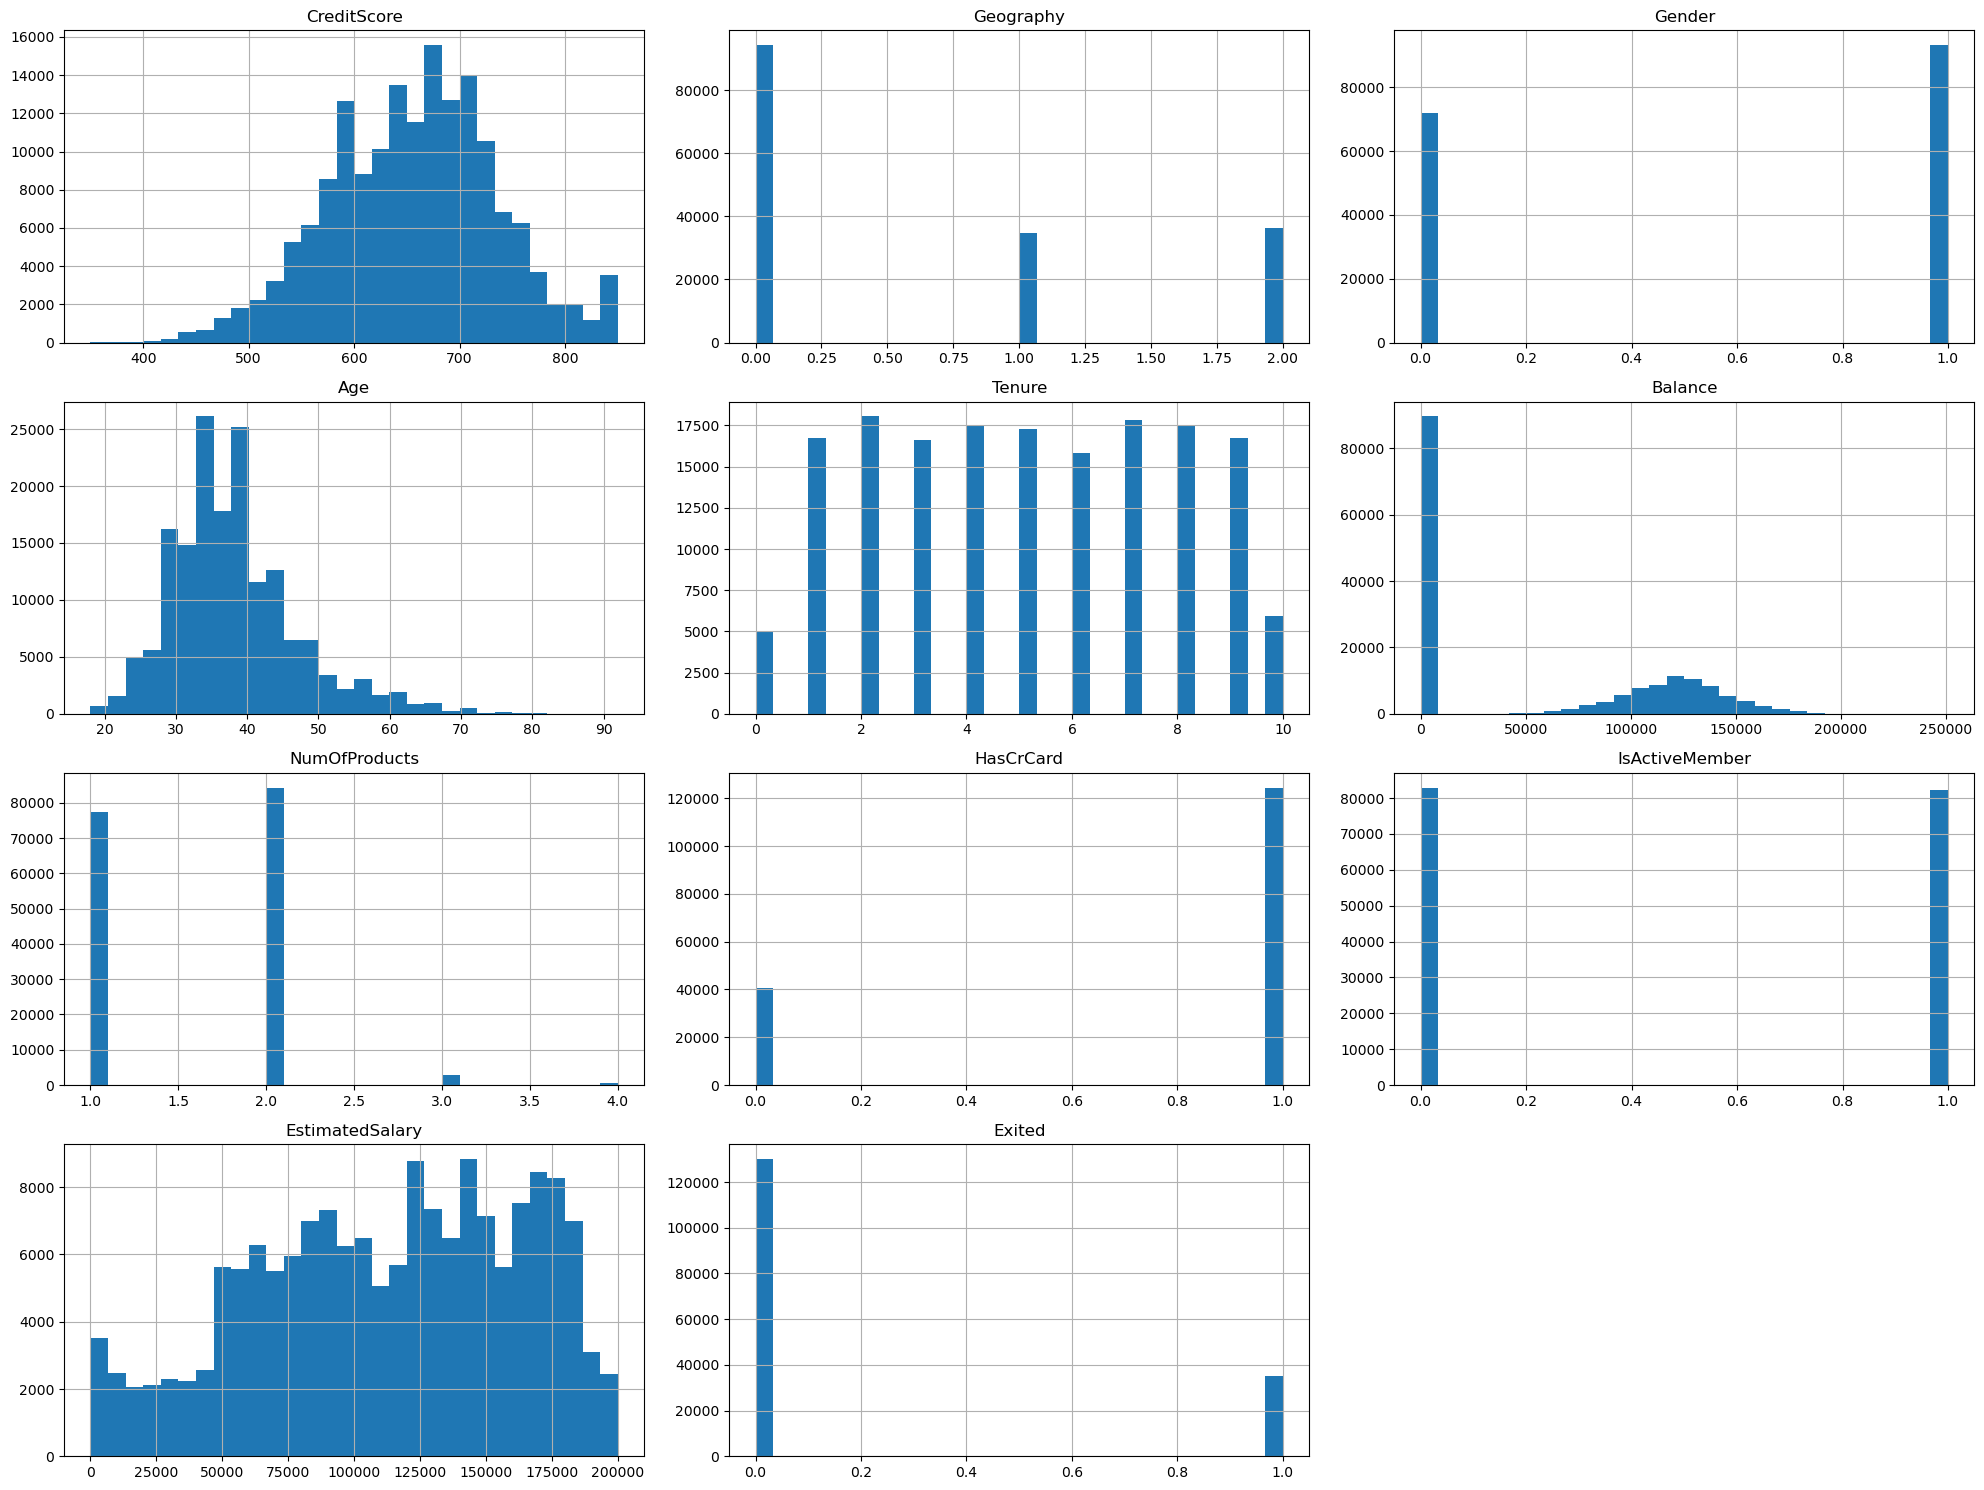

In [12]:
# Histograms
df_2.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


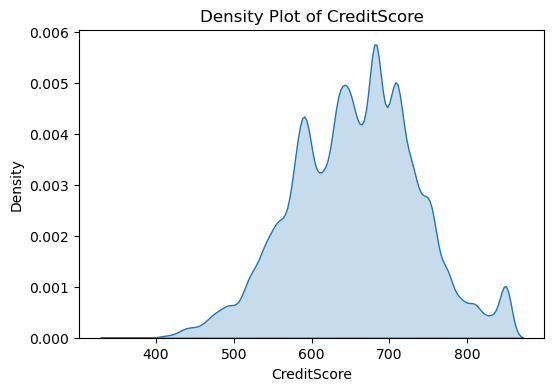

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


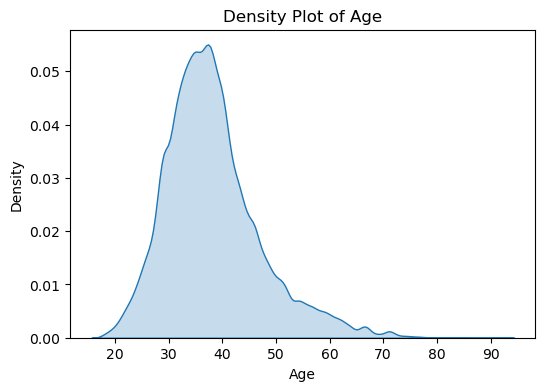

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


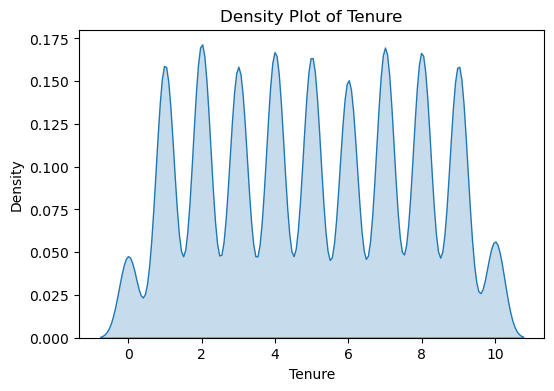

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


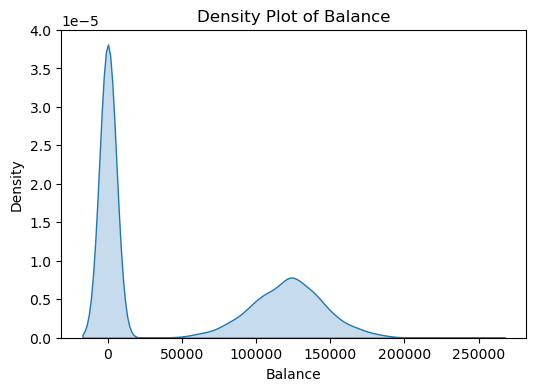

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


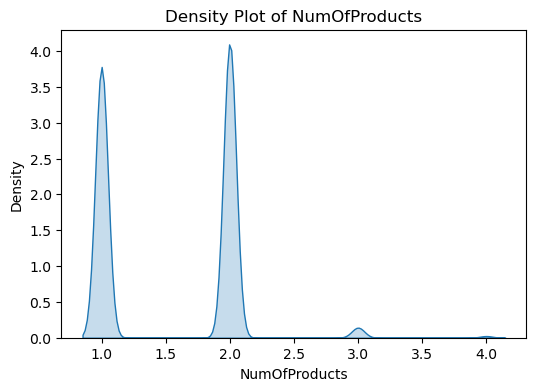

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


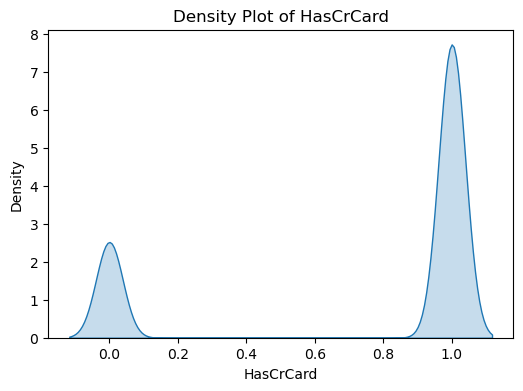

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


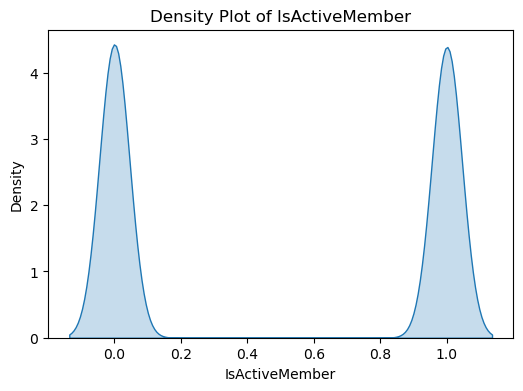

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


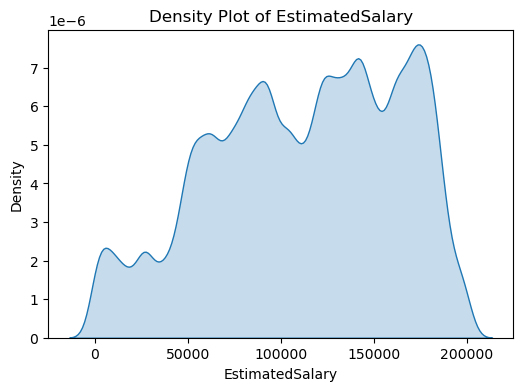

C:\Users\ilyas\AppData\Local\Temp\ipykernel_4000\731118632.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_2[column], shade=True)


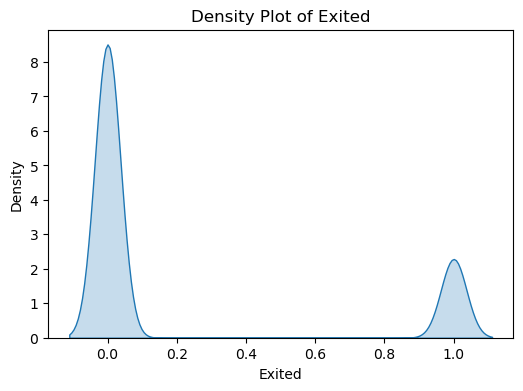

In [13]:
# Sayısal özellikler için yoğunluk grafikleri oluşturma
for column in df_2.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_2[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


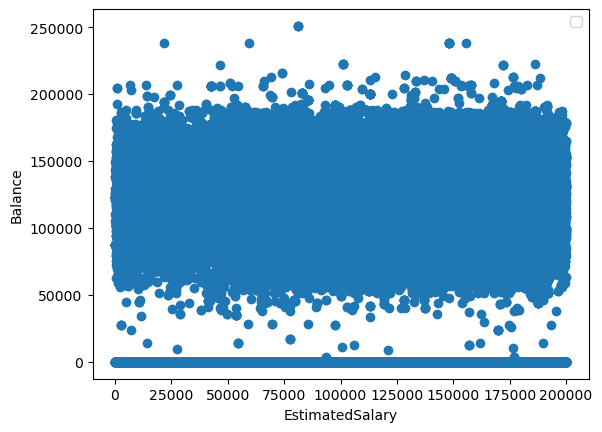

In [14]:
# Relationship between columns
plt.scatter(df_2['EstimatedSalary'], df_2['Balance'])

plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.legend()

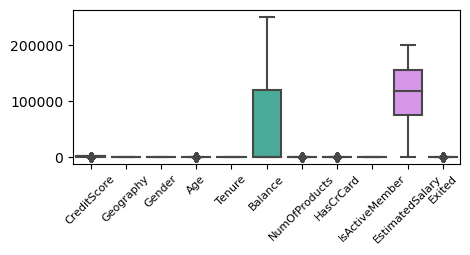

In [15]:
# Step 3: Plot the Boxplot
plt.figure(figsize=(5, 2))

sns.boxplot(data=df_2)
plt.xticks(rotation=45, fontsize=8)  
plt.show()

### 7- Building Model-0 // Benchmark

In [16]:
# Independent Features
X = df_2[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]

# Dependent Features
y = df_2['Exited']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Logistic Regression modelini oluşturma ve eğitme
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [19]:
# Run the Model Evaluation
evaluate_model(clf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.7847614760697004
Training ROC AUC: 0.7144343288655823

Test Accuracy: 0.787340187029145

***Test ROC AUC: 0.7125823576472932***


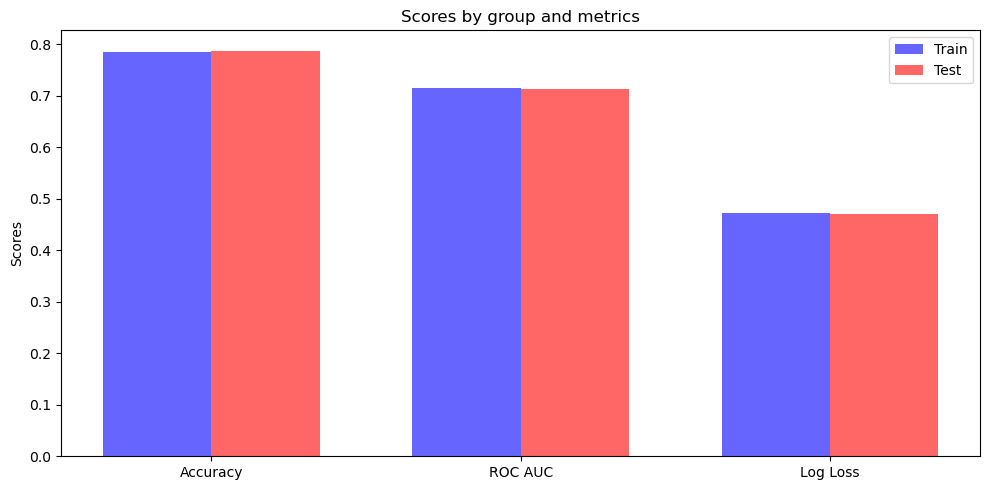

In [20]:
# Run Model Success Metrics Visuals
evaluate_model_performance(clf, X_train, X_test, y_train, y_test)

## Değerlendirme:
Accuracy (Doğruluk):

Eğitim setindeki doğruluk %78.47 ve test setindeki doğruluk %78.73 olarak görünüyor. Bu değerler birbirine oldukça yakın, bu da modelin overfitting (aşırı öğrenme) yapmadığını gösterir. Genel olarak, modelin performansı eğitim ve test setlerinde tutarlıdır.
ROC AUC:

ROC AUC, modelin sınıflandırma yeteneğini ölçer ve 1'e ne kadar yakınsa, model o kadar iyidir. Eğitim setinde ROC AUC skoru 0.714, test setinde ise 0.712 olarak elde edilmiş. Bu skorlar, modelin sınıflandırma yeteneğinin makul düzeyde olduğunu, ancak mükemmel olmadığını gösteriyor.

## Sonuç ve Tavsiyeler:
Performansın İyileştirilmesi:

Modelin ROC AUC skoru 0.71 civarında, bu da modelin sınıflandırma performansının biraz iyileştirilebileceğini gösterir. Daha karmaşık modeller veya özellik mühendisliği (feature engineering) yaparak performans artırılabilir.
Dengeli Veri Seti ve Diğer Metrikler:

Eğer veri setinde sınıf dengesizliği varsa, bu durum doğruluk (accuracy) metriğini yanıltıcı yapabilir. Bu durumda, precision, recall ve F1 score gibi diğer metriklere de bakmak faydalı olabilir.
Overfitting/Underfitting Analizi:

Eğitim ve test doğrulukları oldukça yakın, bu da modelin overfitting yapmadığını ve genelleme yeteneğinin makul olduğunu gösteriyor. Ancak, modelin daha fazla iyileştirilmesi ve karmaşık veri örüntülerini yakalayabilmesi için, daha gelişmiş modeller (örneğin, Random Forest, Gradient Boosting) denenebilir.
Sonuç olarak, mevcut model temel bir değerlendirme olarak iyi bir performans göstermektedir. Ancak, bu performansı artırmak için ek model tuning ve veri ön işleme adımları atılabilir. Bu, özellikle daha yüksek doğruluk ve daha iyi ROC AUC skorları elde etmek için faydalı olabilir.

### 8- Data Cleaning

#### 8.1- Drop Outliers

In [21]:
# Copy the dataset
df_3 = df_2

In [22]:
# Remove rows where Balance is zero
df_3 = df_3[df_3['Balance'] != 0]

# Calculate Q1 and Q3 on the non-zero Balance values
Q1 = df_3['Balance'].quantile(0.10)
Q3 = df_3['Balance'].quantile(0.90)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers among the non-zero balances
outliers = (df_3['Balance'] < lower_bound) | (df_3['Balance'] > upper_bound)

# Remove the identified outliers
df_3 = df_3[~outliers]

<Axes: xlabel='Balance', ylabel='Count'>

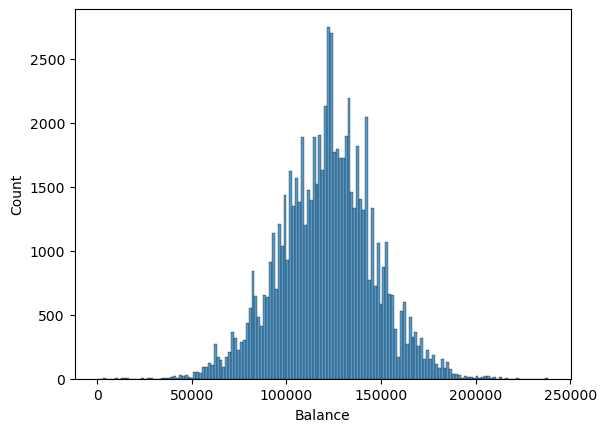

In [23]:
sns.histplot(df_3['Balance'])

In [24]:
# Remove rows where Balance is zero
df_3 = df_3[df_3['EstimatedSalary'] > 0]

# Calculate Q1 and Q3 on the non-zero Balance values
Q1 = df_3['EstimatedSalary'].quantile(0.10)
Q3 = df_3['EstimatedSalary'].quantile(0.90)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers among the non-zero balances
outliers = (df_3['EstimatedSalary'] < lower_bound) | (df_3['EstimatedSalary'] > upper_bound)

# Remove the identified outliers
df_3 = df_3[~outliers]

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

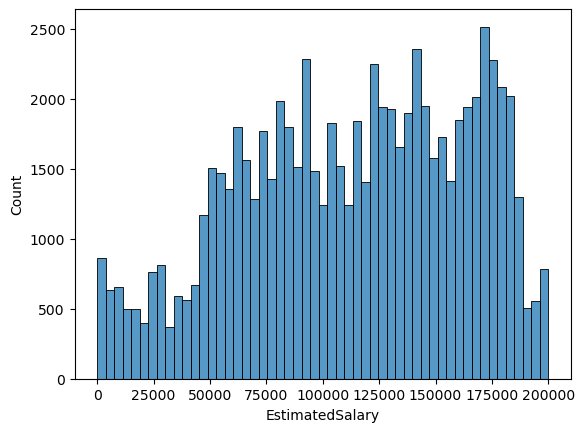

In [25]:
# Check Histogram for EstimatedSalary
sns.histplot(df_3['EstimatedSalary'])

#### 8.2- Standart Scaler

In [26]:
# Copy the dataset
df_4 = df_3.copy()

In [27]:
# List of columns to scale
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the selected columns
df_4[columns_to_scale] = min_max_scaler.fit_transform(df_4[columns_to_scale])

In [28]:
# Check the output
df_4.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,0.462,0,1,0.216216,0.2,0.624511,1,1.0,1.0,0.422787,0
5,0.476,1,1,0.243243,0.4,0.552757,1,1.0,0.0,0.680129,1
6,0.486,0,0,0.162162,0.8,0.607269,1,1.0,0.0,0.148917,0
7,0.656,2,1,0.256757,0.1,0.580856,1,1.0,0.0,0.534251,0
9,0.466,1,1,0.297297,0.4,0.340883,1,1.0,1.0,0.854239,0


### 9- Model 1

#### 9.1- Logistic Regression

In [29]:
# Independent Features
X = df_4[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]

# Dependent Features
y = df_4['Exited']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Logistic Regression modelini oluşturma ve eğitme
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [32]:
# Run the Model Evaluation
evaluate_model(clf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.7742760764099454
Training ROC AUC: 0.7651532076120491

Test Accuracy: 0.7729825337165598

***Test ROC AUC: 0.7610386283883653***


#### 9.2- Decision Trees and Random Forest

In [47]:
# Models initialization
log_reg = LogisticRegression(solver="liblinear")
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predicting and evaluating
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest
}

In [50]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba)}")
    print("\n")

Logistic Regression Results:
Accuracy: 0.7729825337165598
ROC AUC: 0.7610386283883653


Decision Tree Results:
Accuracy: 0.7206721202741543
ROC AUC: 0.6513333100550018


Random Forest Results:
Accuracy: 0.7936767632102587
ROC AUC: 0.7870055922324769


